In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\FINAL PROJECT\\company_esg_financial_dataset.csv')

In [4]:
df.head()

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

In [6]:
df.describe()

,CompanyID,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,10000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,1.100000e+04,1.100000e+04
mean,500.500000,2020.000000,4670.850591,10.900455,13380.622236,4.830370,54.615273,56.416991,55.660582,51.767655,1.271462e+06,5.600442e+05,1.165839e+07
std,288.688113,3.162421,9969.954369,8.758711,39922.870373,9.424787,15.893937,26.767233,23.356152,25.323370,5.067760e+06,1.565686e+06,5.095836e+07
min,1.000000,2015.000000,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000,2.042200e+03,1.021100e+03,5.105500e+03
25%,250.750000,2017.000000,938.775000,5.300000,1098.525000,-1.325000,44.100000,34.700000,37.600000,30.775000,1.228530e+05,6.488467e+04,3.069161e+05
50%,500.500000,2020.000000,1902.300000,10.500000,3096.450000,4.900000,54.600000,55.600000,55.150000,52.100000,2.920734e+05,2.038805e+05,1.221745e+06
75%,750.250000,2023.000000,4342.625000,16.300000,9995.500000,11.000000,65.600000,79.000000,73.800000,73.000000,7.407311e+05,5.251880e+05,5.616437e+06
max,1000.000000,2025.000000,180810.400000,50.000000,865271.700000,38.000000,98.800000,100.000000,100.000000,100.000000,1.741047e+08,5.223142e+07,1.741047e+09


In [7]:
df['GrowthRate'] = df['GrowthRate'].fillna(df['GrowthRate'].median())

In [8]:
duplicates = df.duplicated().sum()
duplicates

0

In [9]:
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
outliers = df[(df['Revenue'] < lower_bound) | (df['Revenue'] > upper_bound)]
print(f"\nDetected {len(outliers)} outliers in Revenue.")


Detected 1202 outliers in Revenue.


In [11]:
df['Revenue_Cleaned'] = np.where(df['Revenue'] > upper_bound, upper_bound,
np.where(df['Revenue'] < lower_bound, lower_bound, df['Revenue']))

In [12]:
df['ESG_Balance_Std'] = df[['ESG_Environmental', 'ESG_Social', 'ESG_Governance']].std(axis=1)

In [13]:
df['Is_High_Growth'] = np.where(df['GrowthRate'] > 5.0, 1, 0)

In [14]:
print("\n--- Pre-processed Data (First 5 Rows) ---")
print(df[['CompanyName', 'Revenue', 'GrowthRate', 'Is_High_Growth']].head().to_markdown(index=False, numalign="left", stralign="left"))


--- Pre-processed Data (First 5 Rows) ---
| CompanyName   | Revenue   | GrowthRate   | Is_High_Growth   |
|:--------------|:----------|:-------------|:-----------------|
| Company_1     | 459.2     | 4.9          | 0                |
| Company_1     | 473.8     | 3.2          | 0                |
| Company_1     | 564.9     | 19.2         | 1                |
| Company_1     | 558.4     | -1.1         | 0                |
| Company_1     | 554.5     | -0.7         | 0                |


In [15]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
print(corr_matrix)

                      CompanyID          Year   Revenue  ProfitMargin  \
CompanyID          1.000000e+00 -1.281653e-12 -0.037784      0.034306   
Year              -1.281653e-12  1.000000e+00  0.102280     -0.002463   
Revenue           -3.778439e-02  1.022803e-01  1.000000      0.132488   
ProfitMargin       3.430582e-02 -2.463087e-03  0.132488      1.000000   
MarketCap         -3.856375e-02  8.337931e-02  0.836884      0.259927   
GrowthRate         1.407668e-02 -4.414052e-03  0.162354      0.058999   
ESG_Overall        2.316232e-02  1.278648e-01  0.148869      0.088006   
ESG_Environmental  2.657654e-02  1.089338e-01  0.206628      0.218662   
ESG_Social         2.990646e-03  7.083805e-02  0.047173     -0.032642   
ESG_Governance     1.272484e-02  6.035195e-02  0.018489     -0.035372   
CarbonEmissions    1.225854e-02  4.549357e-02  0.507967     -0.006027   
WaterUsage         1.031023e-02  6.033245e-02  0.540424     -0.002967   
EnergyConsumption  1.468242e-02  4.076111e-02  0.47

In [16]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
print(corr_matrix)

                      CompanyID          Year   Revenue  ProfitMargin  \
CompanyID          1.000000e+00 -1.281653e-12 -0.037784      0.034306   
Year              -1.281653e-12  1.000000e+00  0.102280     -0.002463   
Revenue           -3.778439e-02  1.022803e-01  1.000000      0.132488   
ProfitMargin       3.430582e-02 -2.463087e-03  0.132488      1.000000   
MarketCap         -3.856375e-02  8.337931e-02  0.836884      0.259927   
GrowthRate         1.407668e-02 -4.414052e-03  0.162354      0.058999   
ESG_Overall        2.316232e-02  1.278648e-01  0.148869      0.088006   
ESG_Environmental  2.657654e-02  1.089338e-01  0.206628      0.218662   
ESG_Social         2.990646e-03  7.083805e-02  0.047173     -0.032642   
ESG_Governance     1.272484e-02  6.035195e-02  0.018489     -0.035372   
CarbonEmissions    1.225854e-02  4.549357e-02  0.507967     -0.006027   
WaterUsage         1.031023e-02  6.033245e-02  0.540424     -0.002967   
EnergyConsumption  1.468242e-02  4.076111e-02  0.47

Text(0.5, 1.0, 'Correlation Heatmap of Features')

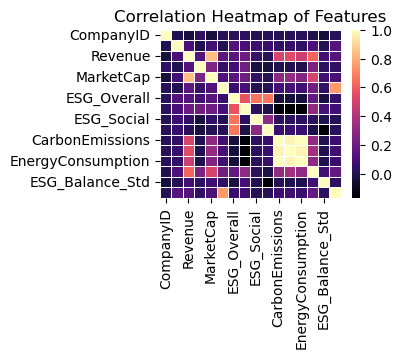

In [17]:
plt.subplot(2, 2, 1)
sns.heatmap(corr_matrix, annot=False, cmap='magma', linewidths=0.5)
plt.title('Correlation Heatmap of Features')

Text(0.5, 1.0, 'Distribution of Revenue ')

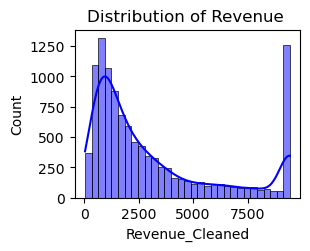

In [18]:
plt.subplot(2, 2, 2)
sns.histplot(df['Revenue_Cleaned'], kde=True, color='blue')
plt.title('Distribution of Revenue ')

Text(0, 0.5, 'Revenue (Cleaned)')

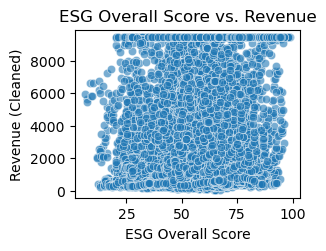

In [19]:
plt.subplot(2, 2, 3)
sns.scatterplot(x='ESG_Overall', y='Revenue_Cleaned', data=df, alpha=0.6)
plt.title('ESG Overall Score vs. Revenue')
plt.xlabel('ESG Overall Score')
plt.ylabel('Revenue (Cleaned)')

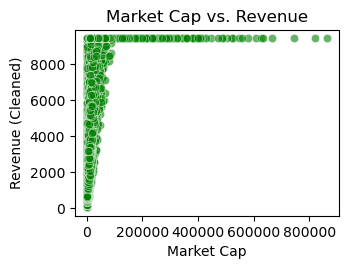

In [20]:
plt.subplot(2, 2, 4)
sns.scatterplot(x='MarketCap', y='Revenue_Cleaned', data=df, alpha=0.6, color='green')
plt.title('Market Cap vs. Revenue')
plt.xlabel('Market Cap')
plt.ylabel('Revenue (Cleaned)')
plt.tight_layout()
plt.show()

In [21]:
print("Top Correlations with Revenue_Cleaned:")
print(corr_matrix['Revenue_Cleaned'].sort_values(ascending=False).head(10))

Top Correlations with Revenue_Cleaned:
Revenue_Cleaned      1.000000
Revenue              0.621925
MarketCap            0.506525
WaterUsage           0.362268
CarbonEmissions      0.319942
EnergyConsumption    0.304239
ESG_Environmental    0.304216
ProfitMargin         0.255393
GrowthRate           0.216993
Is_High_Growth       0.182147
Name: Revenue_Cleaned, dtype: float64


In [22]:
features = ['MarketCap', 'ESG_Environmental', 'GrowthRate', 'EnergyConsumption']
target = 'Revenue_Cleaned'

X = df[features]
y = df[target]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance Metrics:")
print(f"R-squared (Accuracy): {r2:.4f}")
print(f"RMSE (Error Margin): {rmse:.2f}")

Model Performance Metrics:
R-squared (Accuracy): 0.1625
RMSE (Error Margin): 2701.55


In [27]:
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
             Feature  Coefficient
0          MarketCap     0.030390
1  ESG_Environmental    28.852945
2         GrowthRate    40.639646
3  EnergyConsumption     0.000022


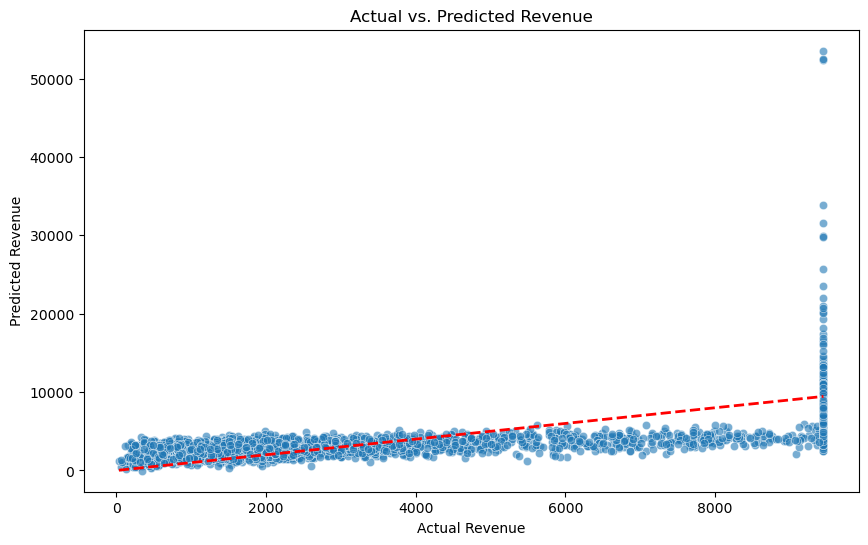

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) 
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title(f'Actual vs. Predicted Revenue')
plt.show()

In [29]:
df_encoded = pd.get_dummies(df, columns=['Industry', 'Region'], drop_first=True)

In [30]:
features_to_exclude = ['CompanyID', 'CompanyName', 'Year', 'Revenue', 'Revenue_Cleaned']

In [31]:
x = df_encoded.drop(columns=features_to_exclude)
y = df_encoded['Revenue_Cleaned']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [33]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred_rf = rf_model.predict(X_test)

In [35]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest Model Performance:")
print(f"R-squared: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.2f}")

Random Forest Model Performance:
R-squared: 0.9738
RMSE: 477.80


In [36]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False).head(10)

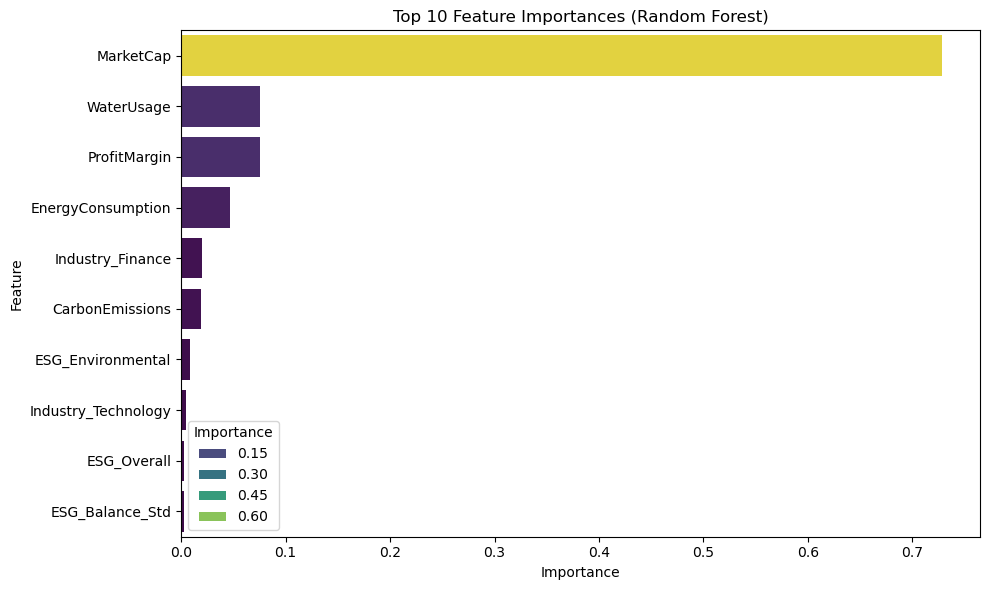

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis',hue='Importance')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

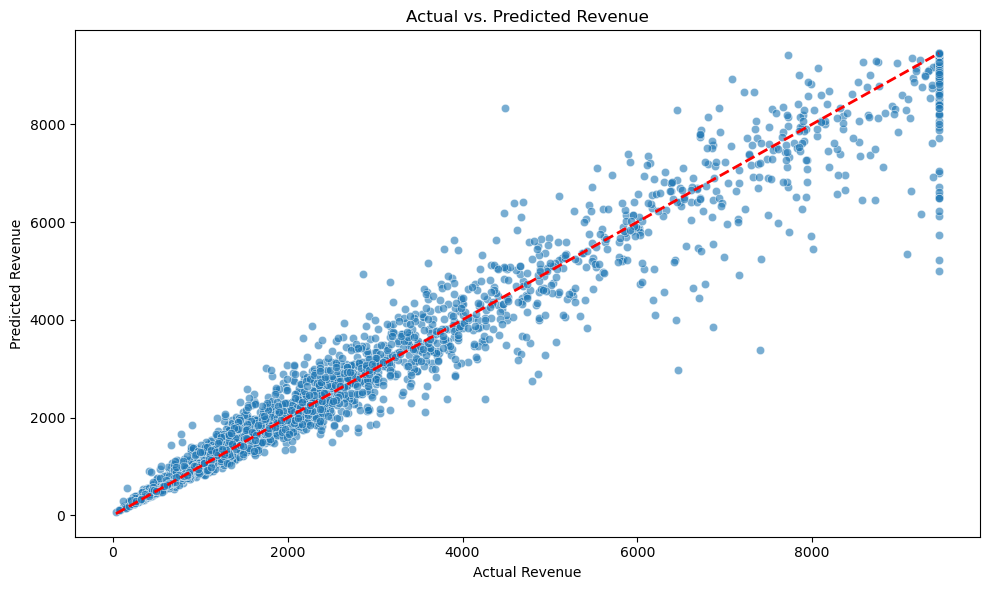

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')
plt.tight_layout()

In [39]:
import joblib
joblib.dump(rf_model, 'random_forest_revenue_model.pkl')
plt.show()
